<a href="https://colab.research.google.com/github/VaishnaviDayal7/AeroFit/blob/main/AeroFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

# **Objective:**

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables, contingency tables and charts.

**Goals:**

1. Basic data exploration
2. Outlier detection and treatment
3. Graphical and non graphical analysis of various metrics based on probability
4. Customer profile for each product

In [ ]:
#first, we import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loaded the dataset
treadmill = pd.read_csv('aerofit_treadmill.txt')
treadmill.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# **Basic Data Exploration:**

In [ ]:
treadmill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
treadmill.shape

(180, 9)

# Observations:
- There are 180 rows and 9 columns
- Except product gender and maritial status, every column is an intger datatype.
- There are no missing values in the data set hence missing data handling process is not necessary

In [ ]:
treadmill['Age'].describe()

,Age
count,180.000000
mean,28.788889
std,6.943498
min,18.000000
25%,24.000000
50%,26.000000
75%,33.000000
max,50.000000


In [ ]:
treadmill['Education'].describe()

,Education
count,180.000000
mean,15.572222
std,1.617055
min,12.000000
25%,14.000000
50%,16.000000
75%,16.000000
max,21.000000


In [ ]:
treadmill['Usage'].describe()

,Usage
count,180.000000
mean,3.455556
std,1.084797
min,2.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,7.000000


In [ ]:
treadmill['Income'].describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


In [ ]:
treadmill['Miles'].describe()

,Miles
count,180.000000
mean,103.194444
std,51.863605
min,21.000000
25%,66.000000
50%,94.000000
75%,114.750000
max,360.000000


In [ ]:
treadmill['Fitness'].describe()

,Fitness
count,180.000000
mean,3.311111
std,0.958869
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


# Observation:
- The average age is around 28.79 years, with most individuals ranging between 24 and 33 years. The age distribution spans from 18 to 50 years.
- The average education level is 15.57 years. The majority have between 14 and 16 years of education, and education ranges from 12 to 21 years.
- On average, people use the product 3.46 times per week, with most users ranging between 3 and 4 times. Some outliers use it up to 7 times a week.
- The average income is around 53,719, with most incomes ranging from 44,058.75 to 58,668. The data shows that the highest income is $ 104,581, indicating a potential presence of higher earners.
- On average, individuals travel 103.19 miles per week, with a large variation (standard deviation of 51.86). The range is wide, from 21 to 360 miles, with most people traveling between 66 and 115 miles.
- The average fitness score is 3.31, with most scores falling between 3 and 4. The scores range from 1 to 5, indicating varying levels of self-reported fitness across the group.



---



# **Outlier Detection**

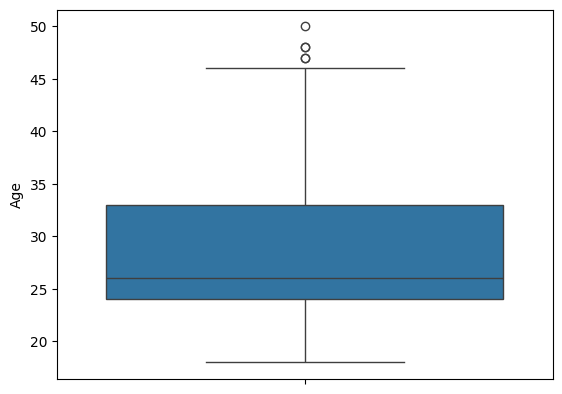

In [ ]:
#1 Age Variable
sns.boxplot(data=treadmill,y='Age')
plt.show()

In [ ]:
#since there are quite a few outliers in the usage column, we will clip the data such that outliers are removed
iqr = np.percentile(treadmill['Age'],75) - np.percentile(treadmill['Age'],25)
upper = np.percentile(treadmill['Age'],75) + (1.5 * iqr)
lower = np.percentile(treadmill['Age'],25) - (1.5 * iqr)

In [ ]:
treadmill['Age']= np.clip(treadmill['Age'],lower,upper)
treadmill.sort_values(by='Age',ascending=False).head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
179,KP781,46.5,Male,18,Partnered,4,5,95508,180
79,KP281,46.5,Female,16,Partnered,3,3,64809,66
178,KP781,46.5,Male,18,Partnered,4,5,104581,120
139,KP481,46.5,Male,16,Partnered,2,3,57987,64
78,KP281,46.5,Male,16,Partnered,4,3,56850,94


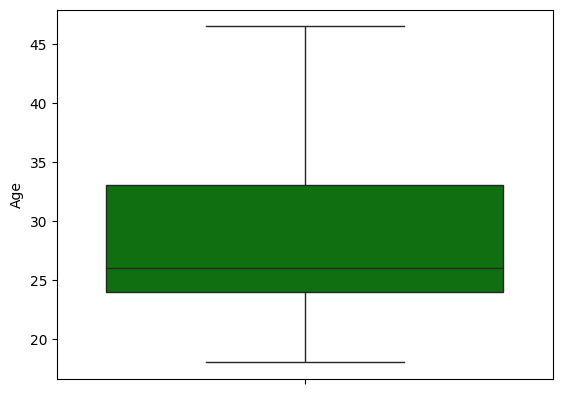

In [ ]:
#After removing the outliers, our Age column does not contain any outliers
sns.boxplot(data=treadmill,y='Age',color='green')
plt.show()

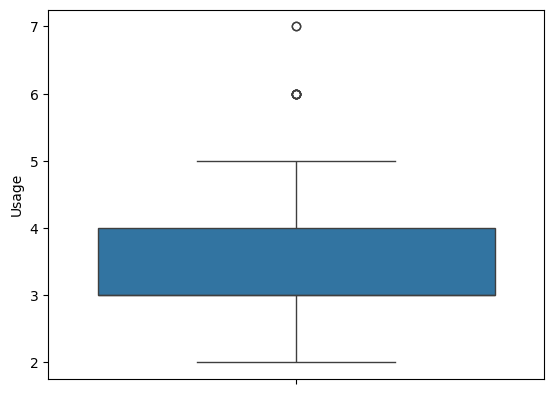

In [ ]:
#2 Usage Vairiable
sns.boxplot(data=treadmill,y='Usage')
plt.show()

In [ ]:
#since there are quite a few outliers in the usage column, we will clip the data such that outliers are removed
iqr = np.percentile(treadmill['Usage'],75) - np.percentile(treadmill['Usage'],25)
upper = np.percentile(treadmill['Usage'],75) + (1.5 * iqr)
lower = np.percentile(treadmill['Usage'],25) - (1.5 * iqr)

In [ ]:
treadmill['Usage']= np.clip(treadmill['Usage'],lower,upper)
treadmill.sort_values(by='Usage',ascending=False).head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
166,KP781,29.0,Male,14,Partnered,5.5,5,85906,300
154,KP781,25.0,Male,18,Partnered,5.5,4,70966,180
155,KP781,25.0,Male,18,Partnered,5.5,5,75946,240
175,KP781,40.0,Male,21,Single,5.5,5,83416,200
170,KP781,31.0,Male,16,Partnered,5.5,5,89641,260


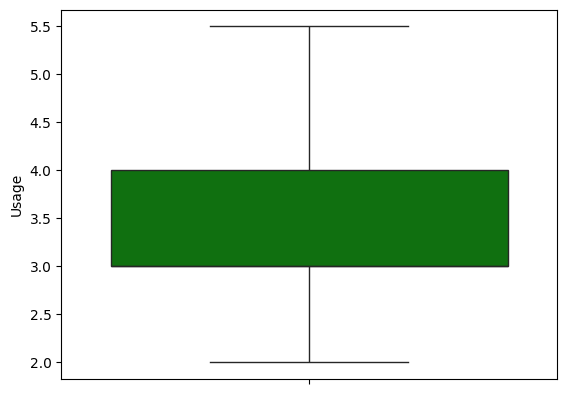

In [ ]:
#After removing the outliers, our Usage column does not contain any outliers
sns.boxplot(data=treadmill,y='Usage',color='green')
plt.show()

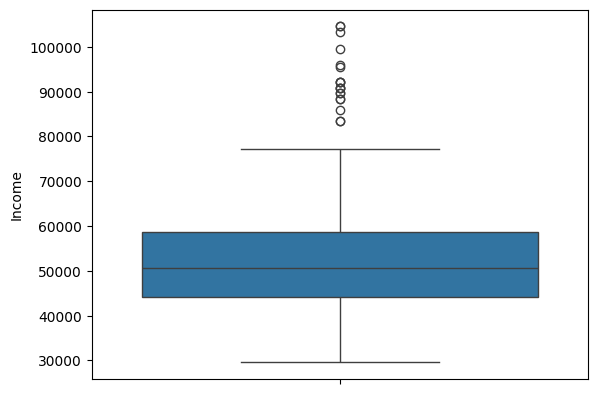

In [ ]:
#3 Income Vairiable
sns.boxplot(data=treadmill,y='Income')
plt.show()

In [ ]:
#since there are quite a few outliers in the Income column, we will clip the data such that outliers are removed
iqr = np.percentile(treadmill['Income'],75) - np.percentile(treadmill['Income'],25)
upper = np.percentile(treadmill['Income'],75) + (1.5 * iqr)
lower = np.percentile(treadmill['Income'],25) - (1.5 * iqr)

In [ ]:
treadmill['Income']= np.clip(treadmill['Income'],lower,upper)
treadmill.sort_values(by='Income',ascending=False).head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
179,KP781,46.5,Male,18,Partnered,4.0,5,80581.875,180
170,KP781,31.0,Male,16,Partnered,5.5,5,80581.875,260
160,KP781,27.0,Male,18,Single,4.0,3,80581.875,100
161,KP781,27.0,Male,21,Partnered,4.0,4,80581.875,100
162,KP781,28.0,Female,18,Partnered,5.5,5,80581.875,180


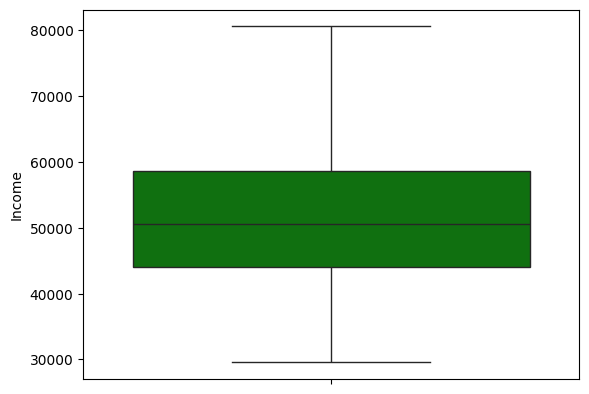

In [ ]:
#After removing the outliers, our Income column does not contain any outliers
sns.boxplot(data=treadmill,y='Income',color='green')
plt.show()

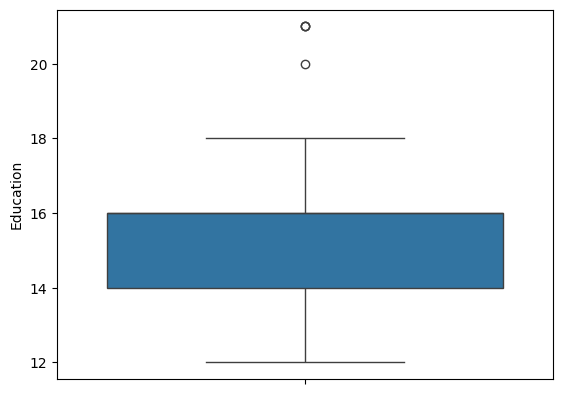

In [ ]:
#4 Education Vairiable
sns.boxplot(data=treadmill,y='Education')
plt.show()

In [ ]:
#since there are quite a few outliers in the Education column, we will clip the data such that outliers are removed
iqr = np.percentile(treadmill['Education'],75) - np.percentile(treadmill['Education'],25)
upper = np.percentile(treadmill['Education'],75) + (1.5 * iqr)
lower = np.percentile(treadmill['Education'],25) - (1.5 * iqr)

In [ ]:
treadmill['Education']= np.clip(treadmill['Education'],lower,upper)
treadmill.sort_values(by='Education',ascending=False).head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40.0,Male,19,Single,5.5,5,80581.875,200
156,KP781,25.0,Male,19,Partnered,4.0,5,74701.000,170
157,KP781,26.0,Female,19,Single,4.0,3,69721.000,100
161,KP781,27.0,Male,19,Partnered,4.0,4,80581.875,100
179,KP781,46.5,Male,18,Partnered,4.0,5,80581.875,180


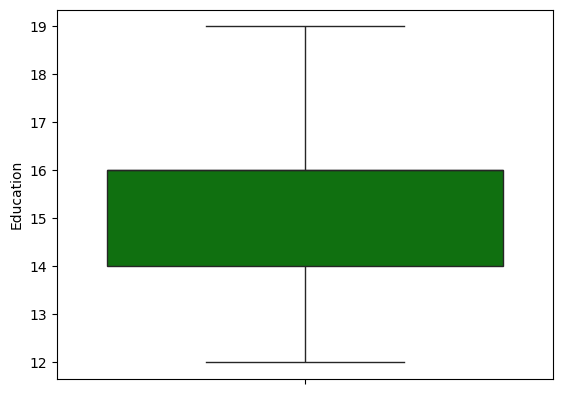

In [ ]:
#After removing the outliers, our Education column does not contain any outliers
sns.boxplot(data=treadmill,y='Education',color='green')
plt.show()

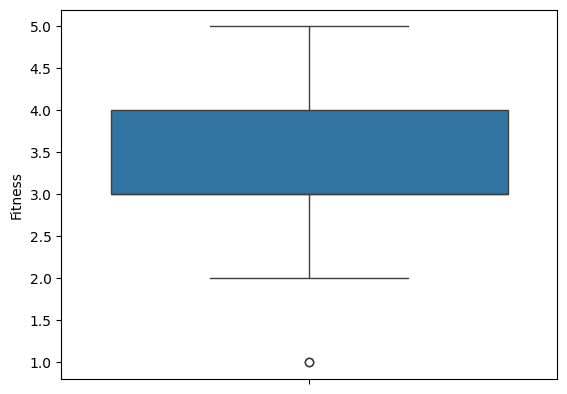

In [ ]:
#5 Fitness Variable
sns.boxplot(data=treadmill,y='Fitness')
plt.show()

In [ ]:
#since there are quite a few outliers in the Fitness column, we will clip the data such that outliers are removed
iqr = np.percentile(treadmill['Fitness'],75) - np.percentile(treadmill['Fitness'],25)
upper = np.percentile(treadmill['Fitness'],75) + (1.5 * iqr)
lower = np.percentile(treadmill['Fitness'],25) - (1.5 * iqr)

In [ ]:
treadmill['Fitness']= np.clip(treadmill['Fitness'],lower,upper)
treadmill.sort_values(by='Fitness',ascending=False).head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
179,KP781,46.5,Male,18,Partnered,4.0,5.0,80581.875,180
146,KP781,24.0,Male,16,Single,4.0,5.0,61006.000,100
148,KP781,24.0,Female,16,Single,5.0,5.0,52291.000,200
149,KP781,24.0,Male,16,Single,5.0,5.0,49801.000,160
150,KP781,25.0,Male,16,Partnered,4.0,5.0,49801.000,120


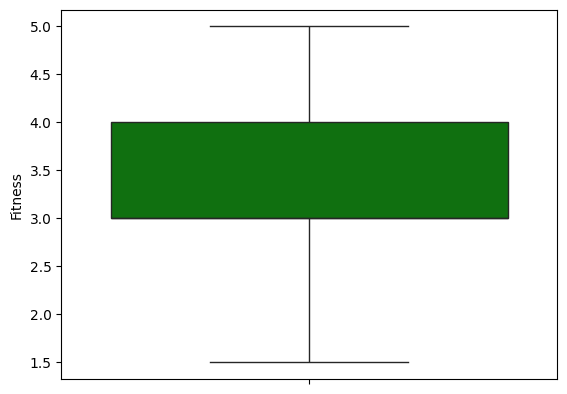

In [ ]:
#After removing the outliers, our Fitness column does not contain any outliers
sns.boxplot(data=treadmill,y='Fitness',color='green')
plt.show()

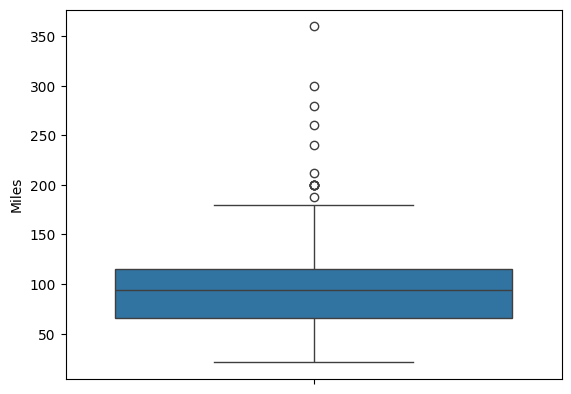

In [ ]:
#6 Miles Variable
sns.boxplot(data=treadmill,y='Miles')
plt.show()

In [ ]:
#since there are quite a few outliers in the Miles column, we will clip the data such that outliers are removed
iqr = np.percentile(treadmill['Miles'],75) - np.percentile(treadmill['Miles'],25)
upper = np.percentile(treadmill['Miles'],75) + (1.5 * iqr)
lower = np.percentile(treadmill['Miles'],25) - (1.5 * iqr)

In [ ]:
treadmill['Miles']= np.clip(treadmill['Miles'],lower,upper)
treadmill.sort_values(by='Miles',ascending=False).head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
152,KP781,25.0,Female,18,Partnered,5.0,5.0,61006.000,187.875
167,KP781,30.0,Female,16,Partnered,5.5,5.0,80581.875,187.875
84,KP481,21.0,Female,14,Partnered,5.0,4.0,34110.000,187.875
176,KP781,42.0,Male,18,Single,5.0,4.0,80581.875,187.875
175,KP781,40.0,Male,19,Single,5.5,5.0,80581.875,187.875


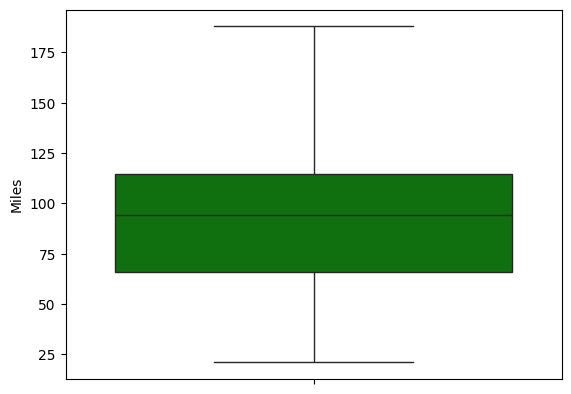

In [ ]:
#After removing the outliers, our Miles column does not contain any outliers
sns.boxplot(data=treadmill,y='Miles',color='green')
plt.show()



---



# **Finding Relationships between Variables**

In [ ]:
#Converting the alpha numeric product names to easy to understand names
treadmill['Product'] = treadmill['Product'].astype(str)
treadmill.loc[treadmill['Product'] == 'KP281', 'Product'] = 'Entry'
treadmill.loc[treadmill['Product'] == 'KP481', 'Product'] = 'Mid'
treadmill.loc[treadmill['Product'] == 'KP781', 'Product'] = 'Advance'

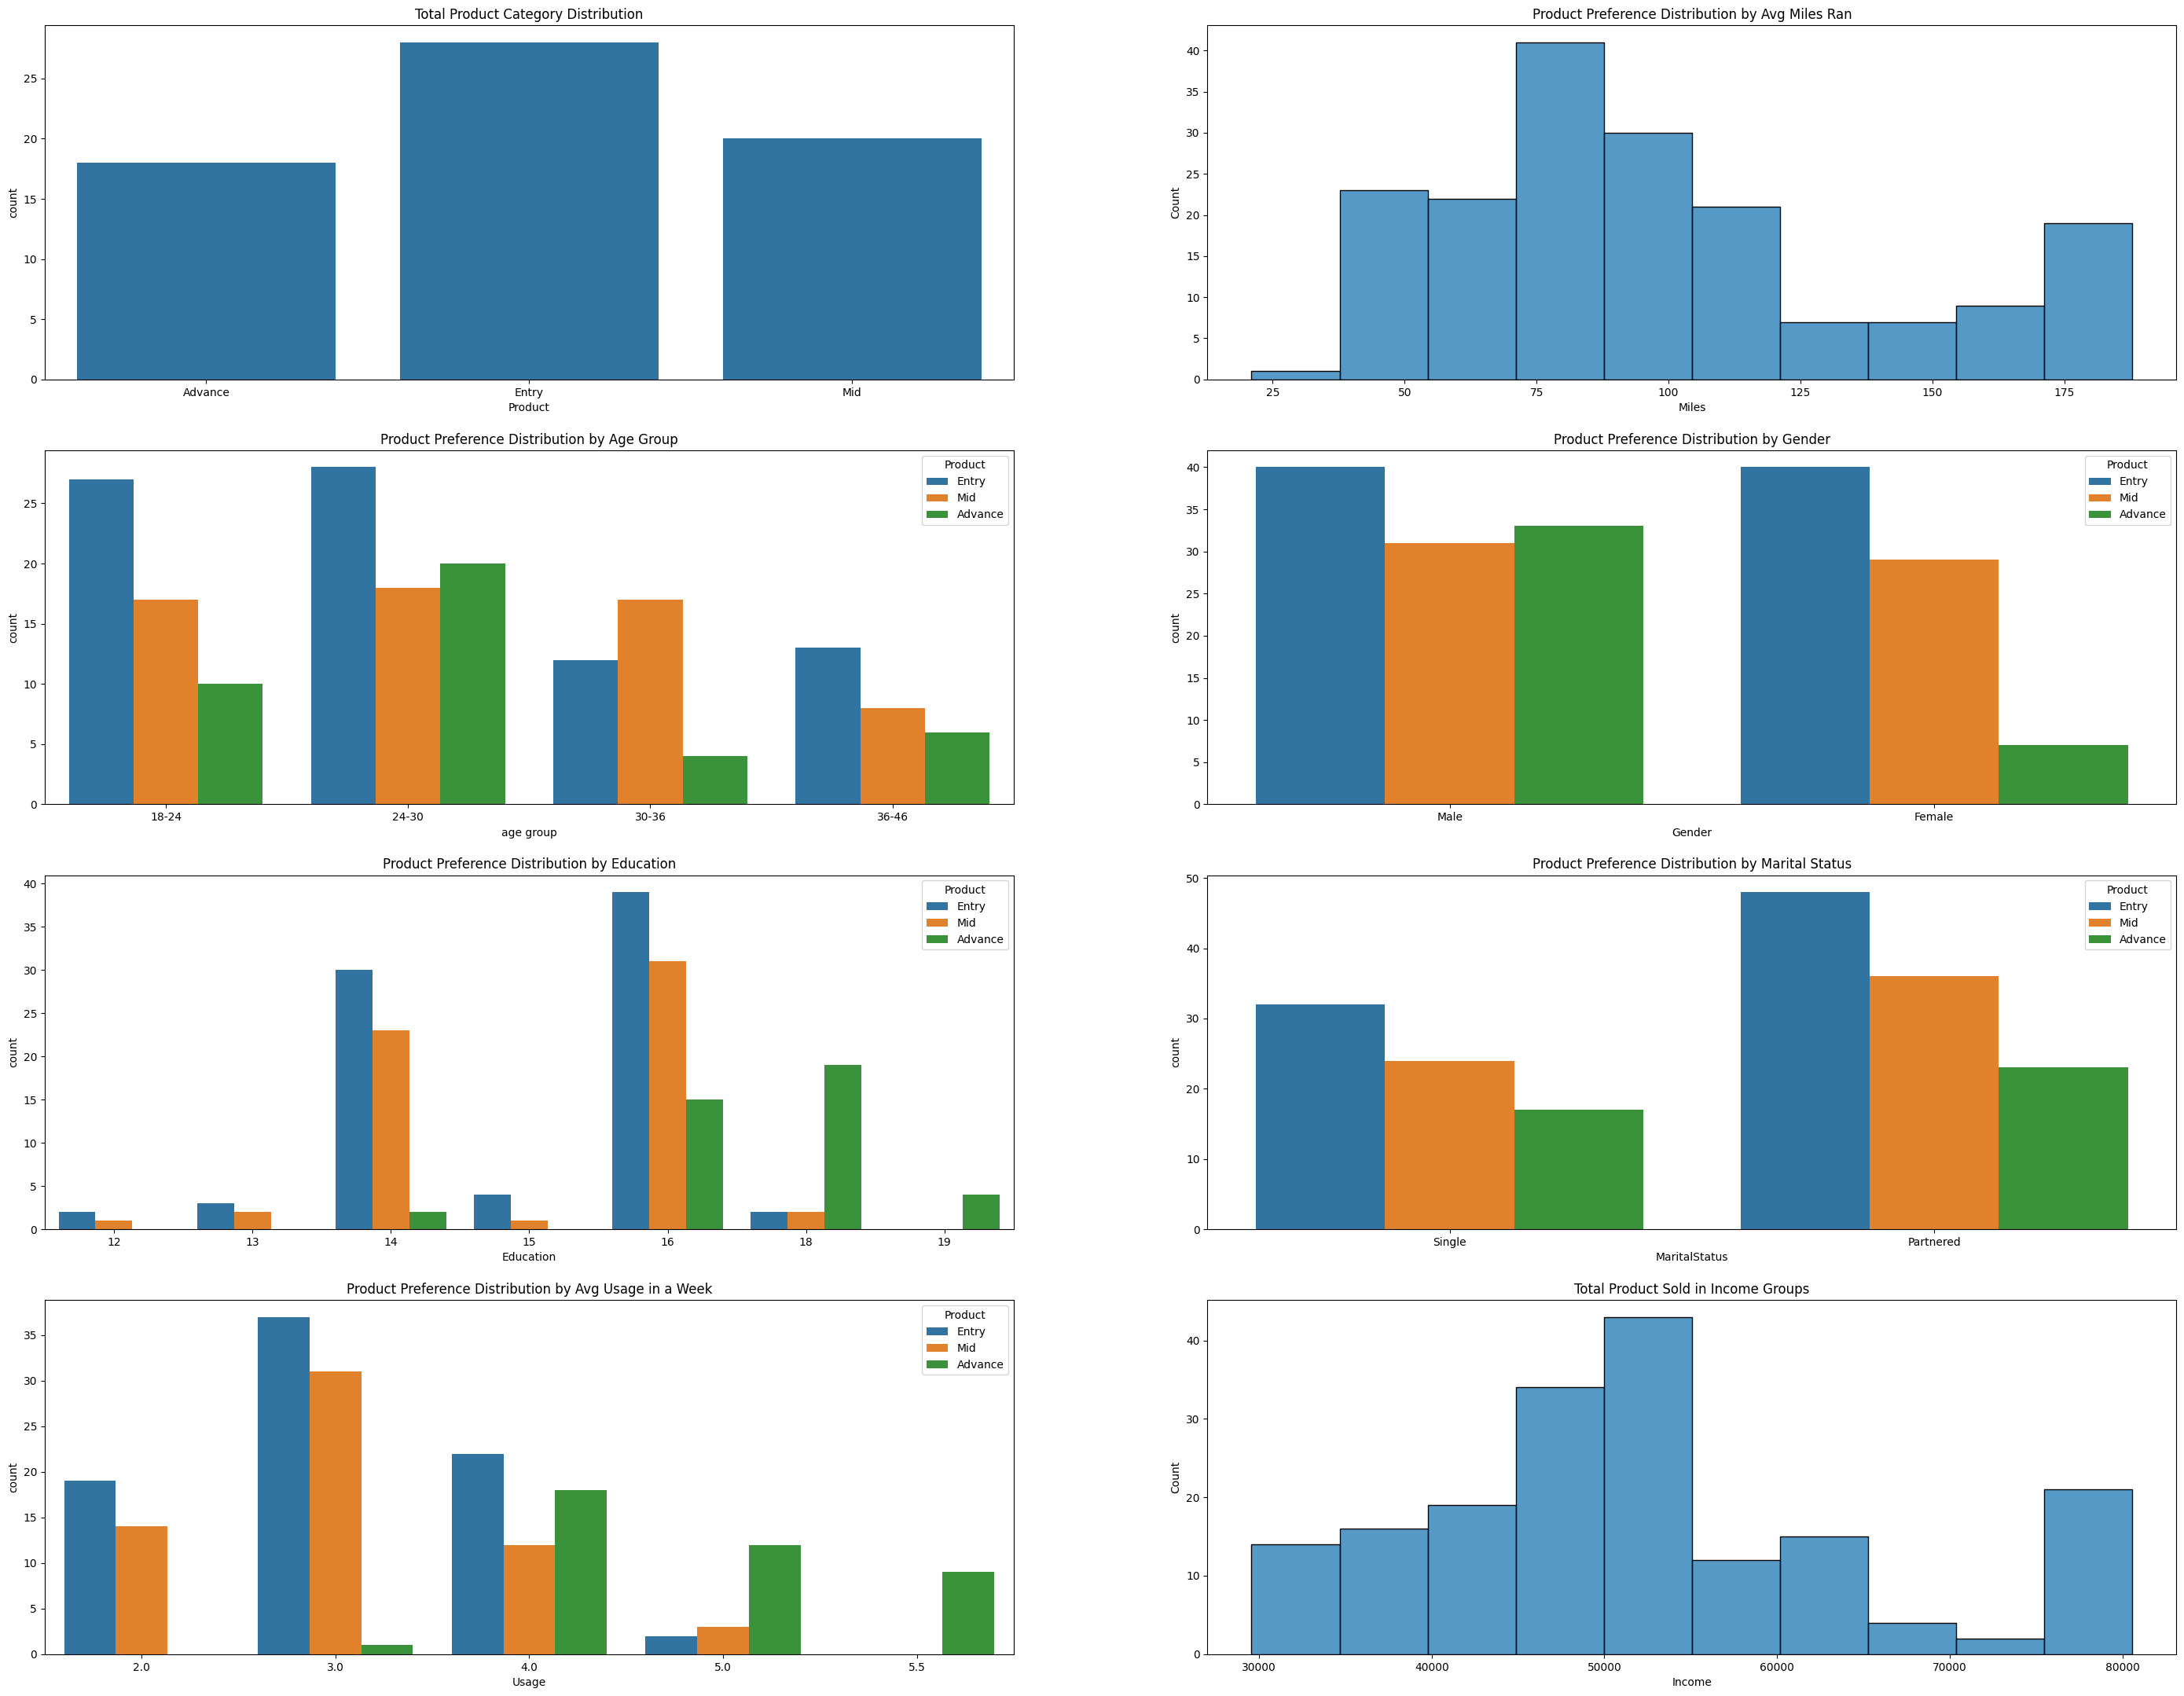

In [ ]:
#Graphical analysis
r1 = treadmill.groupby(['Product','Age'])['Product'].count()
r1.rename('Total',inplace=True)


r1 = r1.reset_index()
bins = [17,24,30,36,47]
labels = ['18-24','24-30','30-36','36-46']
treadmill['age group'] = pd.cut(treadmill['Age'],bins,labels=labels)


plt.figure(figsize=(35,55))
plt.subplot(8,2,1)
plt.title('Total Product Category Distribution')
sns.countplot(data=r1,x='Product')
plt.subplot(8,2,2)
plt.title('Product Preference Distribution by Avg Miles Ran')
sns.histplot(data=treadmill,x='Miles')
plt.subplot(8,2,3)
plt.title('Product Preference Distribution by Age Group')
sns.countplot(data=treadmill,x='age group',hue='Product')
plt.subplot(8,2,4)
plt.title('Product Preference Distribution by Gender')
sns.countplot(data=treadmill,x='Gender',hue='Product')
plt.subplot(8,2,5)
plt.title('Product Preference Distribution by Education')
sns.countplot(data=treadmill,x='Education',hue='Product')
plt.subplot(8,2,6)
plt.title('Product Preference Distribution by Marital Status')
sns.countplot(data=treadmill,x='MaritalStatus',hue='Product')
plt.subplot(8,2,7)
plt.title('Product Preference Distribution by Avg Usage in a Week')
sns.countplot(data=treadmill,x='Usage',hue='Product')
plt.subplot(8,2,8)
plt.title('Total Product Sold in Income Groups')
sns.histplot(data=treadmill,x='Income')
plt.show()

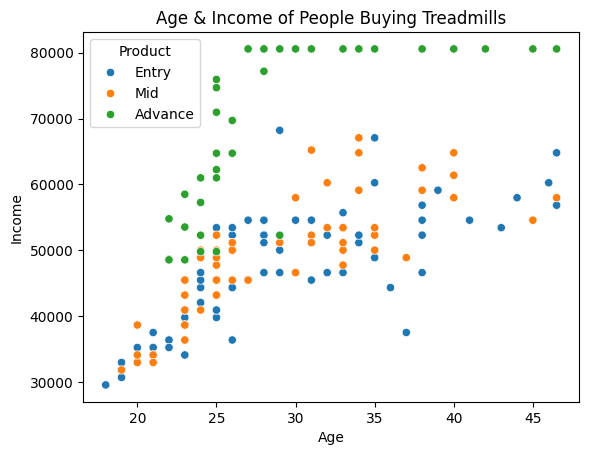

In [ ]:
sns.scatterplot(data=treadmill,x='Age',y='Income',hue='Product')
plt.title('Age & Income of People Buying Treadmills')
plt.show()

# **Observations & Insights:**

1. **Total Product Category Distribution**

Entry-level products have the highest distribution, suggesting that they are the most popular or accessible across all demographics.
Advance-level products and Mid-level products have lower, but comparable demand, with Advance-level slightly lower. This may indicate more specialized appeal or higher pricing, leading to fewer purchases.


2. **Product Preference Distribution by Avg Miles Ran**

A majority of customers fall into the 50-100 miles range for average miles ran, with a peak around 75 miles, indicating this is the most common activity level.
Demand for products drops sharply beyond 100 miles, suggesting fewer high-mileage users are purchasing.
Entry-level products are broadly distributed across all mileage levels, while fewer higher-mileage runners may prefer Mid or Advance products.

3. **Product Preference Distribution by Age Group**

18-24 and 24-30 age groups show the highest counts for entry-level products, suggesting young customers are attracted to more affordable options.
Advance-level products have higher popularity in the 24-30 age group, while Mid-level products are more evenly distributed across 18-36 years, suggesting mid-tier products appeal broadly to mid-aged customers.

4. **Product Preference Distribution by Gender**

Both males and females show strong preference for entry-level products.
Males seem to have slightly more interest in Advance-level products compared to females, while both genders have a significant interest in Mid-level products, suggesting gender does not play a strong role in product type preference but shows subtle variations.

5. **Product Preference Distribution by Education**

Entry-level products are most popular among customers with education levels around 13 to 14 years (possibly high school level), suggesting affordability or entry-level positioning is appealing to less formally educated customers.
Customers with 16 years of education (college level) show a balanced interest in all product levels, while higher education levels (>16) skew slightly toward Advance products, indicating higher education may align with preferences for premium products.

6. **Product Preference Distribution by Marital Status**

Single customers have a higher preference for Entry and Advance products, while married (or partnered) customers show a strong preference for entry-level products.
The balanced demand for Mid-level products across both marital statuses may suggest it appeals broadly regardless of relationship status.

7. **Product Preference Distribution by Avg Usage in a Week**

3-4 times per week is the most common usage range, aligning with the highest counts for entry-level products, suggesting that moderate-frequency users lean toward basic products.
Higher usage frequencies, such as 5+ times per week, show increased preference for Advance products, indicating these products may better meet the needs of frequent users.

8. **Total Product Sold in Income Groups**

The $50,000 - $60,000 income range shows the highest product purchases, with a balanced representation across lower income groups from $30,000 to $60,000.
Lower sales in the $70,000 - $80,000 range could suggest customers in this income bracket may be opting for higher-end alternatives outside the entry-level products or are a smaller customer segment.

9. **Age & Income of People Buying Treadmills**

The graph shows income progression by age across three product levels: Entry, Mid, and Advance. Entry level spans a wide age range but has slower income growth, peaking around 60,000. Mid level sees a steady income rise, reaching up to 70,000, and is concentrated between ages 25-40. The Advance level shows the highest incomes, starting early around age 25, with incomes exceeding 70,000. Overall, there is a clear upward trend in income as age increases, with distinct gaps between the levels.



---



# In Dept Analysis On Each Variable

In [ ]:
m = treadmill['Product'].value_counts().reset_index()
m.columns = ['Product', 'count']

m['Percent'] = round((m['count']/m['count'].sum() * 100),2)

m

,Product,count,Percent
0,Entry,80,44.44
1,Mid,60,33.33
2,Advance,40,22.22


Observation:

- Customers aged 24-30 have the highest probability of purchasing an Advance treadmill (around 30.30%).

- The age group 36-46 follows next with approximately 22.22%.

- Young adults aged 18-24 have a probability of around 18.52%.

- The probability drops to 12.12% for those aged 30-36.

# **Age Group Analysis**

In [ ]:
age = pd.crosstab(treadmill['Product'],treadmill['age group'],margins=True)
age

age group,18-24,24-30,30-36,36-46,All
Product,,,,,
Advance,10,20,4,6,40
Entry,27,28,12,13,80
Mid,17,18,17,8,60
All,54,66,33,27,180


In [ ]:
cols = ['18-24','24-30','30-36','36-46']
sum = {'18-24':54,	'24-30':66	,'30-36':33,	'36-46':27}

for a,b in sum.items():
  age[a] = round((age[a]/b)*100,2)

In [ ]:
age1 = age.loc[['Entry','Mid','Advance'],cols]
age1

age group,18-24,24-30,30-36,36-46
Product,,,,
Entry,50.00,42.42,36.36,48.15
Mid,31.48,27.27,51.52,29.63
Advance,18.52,30.30,12.12,22.22


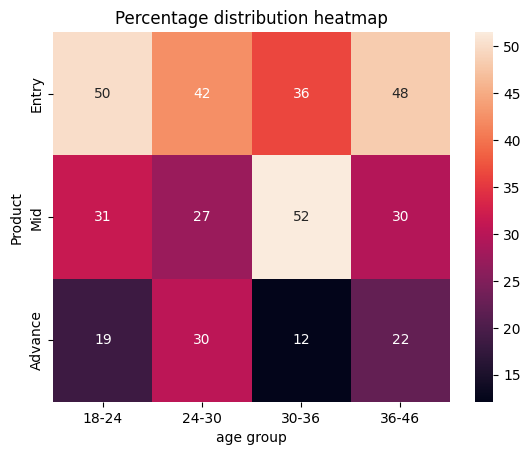

In [ ]:
#Percentage distribution heatmap
sns.heatmap(data=age1,annot=True)
plt.title('Percentage distribution heatmap')
plt.show()

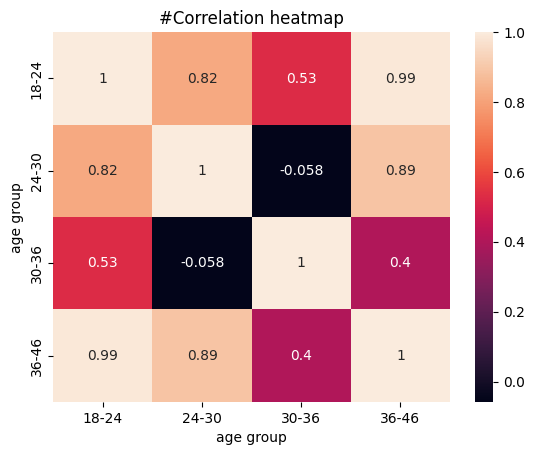

In [ ]:
#Correlation heatmap
sns.heatmap(data=age1.corr(numeric_only=True),annot=True)
plt.title("#Correlation heatmap")
plt.show()

# Observations:

- Advance Product: Popularity peaks among the 24-30 age group (30.30%) and is least popular with those aged 30-36 (12.12%).

- Entry Product: Most favored by the youngest age group, 18-24 (50%), indicating a strong initial preference, but slightly less favored as age increases.

- Mid Product: Particularly popular with the 30-36 age group (51.52%), suggesting a middle-ground preference during these years.

# Insights:

- Youngest Demographic (18-24): Entry-level products dominate. Younger buyers perhaps prefer affordable, accessible options as they enter the market.

- Mid-20s to Early-30s (24-30): Balance between Mid and Entry products, but a notable spike in the purchase of Advanced products, showing a willingness to invest in higher-end options.

- 30s (30-36): Strong lean towards Mid-tier products, possibly indicative of consumers seeking a balance of quality and value.

- Mid-30s to Mid-40s (36-46): Significant appeal for Entry products, indicating a return to value-driven decisions, but also maintaining a steady interest in higher-tier offerings.

# Correlation between age groups:

- Strong positive correlations are observed between neighboring age groups, particularly between 18-24 and 36-46 & 18-24 and 24-30  indicating similarities in trends.
- The 30-36 age group shows a weak or negative correlation with other groups, especially with 24-30 (-0.058), suggesting distinct patterns in this age range.
- Overall, there is a high degree of correlation between younger and older groups, while mid-age ranges exhibit more varied behaviors.

# **Gender Analysis**

In [ ]:
gender = pd.crosstab(treadmill['Product'],treadmill['Gender'],margins=True)

gender

Gender,Female,Male,All
Product,,,
Advance,7,33,40
Entry,40,40,80
Mid,29,31,60
All,76,104,180


In [ ]:
cols1 = ['Male','Female']
sum1 = {'Male':104,'Female':76}

for a,b in sum1.items():
  gender[a] = round((gender[a]/b)*100,2)

In [ ]:
gender1 = gender.loc[['Entry','Mid','Advance'],cols1]
gender1

Gender,Male,Female
Product,,
Entry,38.46,52.63
Mid,29.81,38.16
Advance,31.73,9.21


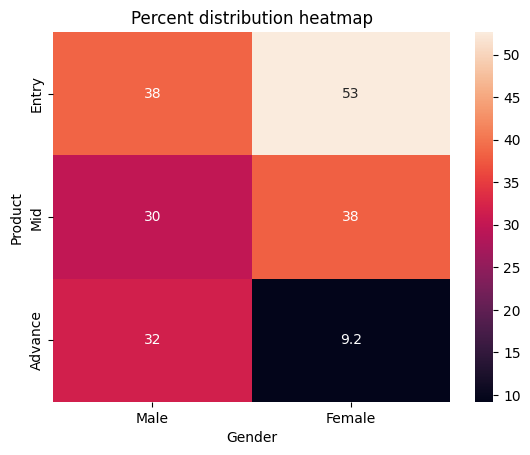

In [ ]:
#Percent distribution heatmap
sns.heatmap(data=gender1,annot=True)
plt.title("Percent distribution heatmap")
plt.show()

# Observations:

Entry Product: More popular among females (52.63%) compared to males (38.46%).

Mid Product: Again, higher preference among females (38.16%) than males (29.81%).

Advance Product: Preferred more by males (31.73%) than females (9.21%).

# Insights:

Gender-Based Preferences: Females show a stronger inclination towards entry-level and mid-range products, suggesting they may prioritize cost-effectiveness and balance.

High-End Product Appeal: Males are more inclined to go for the advanced product, indicating a higher willingness to invest in premium features.

# **Education Analysis**

In [ ]:
edu = pd.crosstab(treadmill['Product'],treadmill['Education'],margins=True)

edu

Education,12,13,14,15,16,18,19,All
Product,,,,,,,,
Advance,0,0,2,0,15,19,4,40
Entry,2,3,30,4,39,2,0,80
Mid,1,2,23,1,31,2,0,60
All,3,5,55,5,85,23,4,180


In [ ]:
#converted the column names to strings
edu.columns = edu.columns.astype('str')

In [ ]:
cols2 = ['12','13','14','15','16','18','19']
sum2 = {'12':3,'13':5,'14':55,'15':5,'16':85,'18':23,'19':4}

for a,b in sum2.items():
  edu[a] = round((edu[a]/b)*100,2)

In [ ]:
edu1 = edu.loc[['Entry','Mid','Advance'],cols2]
edu1

Education,12,13,14,15,16,18,19
Product,,,,,,,
Entry,66.67,60.0,54.55,80.0,45.88,8.70,0.0
Mid,33.33,40.0,41.82,20.0,36.47,8.70,0.0
Advance,0.00,0.0,3.64,0.0,17.65,82.61,100.0


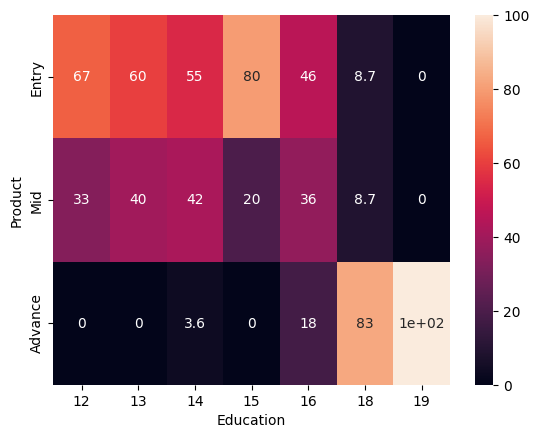

In [ ]:
#Percent distribution heatmap
sns.heatmap(data=edu1,annot=True)
plt.show("Percent distribution heatmap")
plt.show()

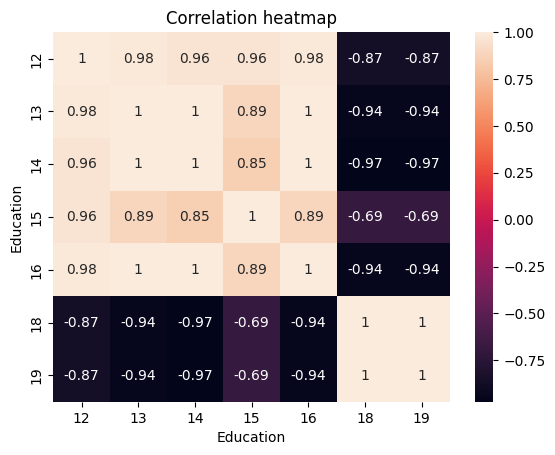

In [ ]:
#Correlation heatmap
sns.heatmap(data=edu1.corr(numeric_only=True),annot=True)
plt.title('Correlation heatmap')
plt.show()

# Observations:

Entry Product: Extremely popular with the younger education levels like 12, 13, and 15, with percentages as high as 66.67% for education level 12 and 80.04% for level 15.

Mid Product: Noticeably increases in popularity among those with education levels 14, 16, and 18, peaking at 78.70% for level 18.

Advance Product: Virtually no interest from lower education levels but skyrockets for higher levels, hitting a full 100% for education level 19.

# Insights:

Younger Education Levels: Preference for Entry products, suggesting they might be more budget-conscious or have simpler needs.

Mid-range Education Levels: A balanced interest between Entry and Mid products, indicating a transitional phase where both affordability and quality matter.

Higher Education Levels: Strong inclination towards Advance products, showing a preference for premium, feature-rich options possibly due to higher income or better understanding of product value.

#Corelation between education levels

Strong positive correlations exist between education levels 12-16 (0.85 to 1), indicating similar trends among individuals with these years of education.

Negative correlations are observed between lower education levels (12-16) and higher education levels (18-19), with values ranging from -0.69 to -0.97, suggesting divergent patterns.

Education levels 18 and 19 have perfect correlation (1), indicating they behave similarly.

Overall, there is a clear division in correlations between those with less education (12-16) and those with higher education (18-19).

# **Marital Status Analysis**

In [ ]:
ms = pd.crosstab(treadmill['Product'],treadmill['MaritalStatus'],margins=True)
ms

MaritalStatus,Partnered,Single,All
Product,,,
Advance,23,17,40
Entry,48,32,80
Mid,36,24,60
All,107,73,180


In [ ]:
cols3 = ['Single','Partnered']
sum3 = {'Single':73,'Partnered':107}

for a,b in sum3.items():
  ms[a] = round((ms[a]/b)*100,2)

In [ ]:
ms1 = ms.loc[['Entry','Mid','Advance'],cols3]
ms1

MaritalStatus,Single,Partnered
Product,,
Entry,43.84,44.86
Mid,32.88,33.64
Advance,23.29,21.50


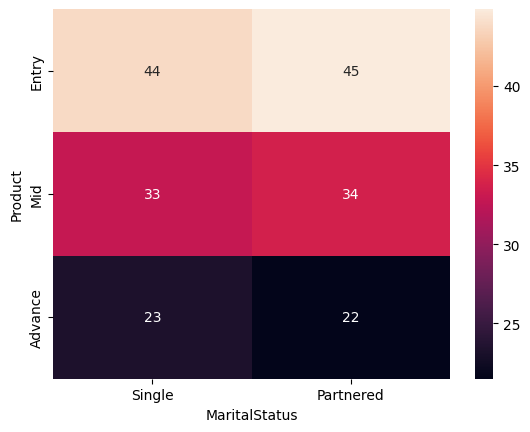

In [ ]:
#Percent distribution heatmap
sns.heatmap(data=ms1,annot=True)
plt.show()

# Observations:

Entry Product: Fairly balanced preference between singles (43.84%) and partnered individuals (44.86%).

Mid Product: Also shows a close split, with singles at 32.88% and partnered at 33.64%.

Advance Product: Slightly lower interest among both singles (23.29%) and partnered (21.50%) groups.

# Insights:

Balanced Preferences: Both singles and partnered individuals show similar preferences across product types. No major disparity.

Moderate Interest in Premium Products: Both groups show the least interest in the Advance product, suggesting cost or features might not be as compelling across marital statuses.


# **Weekly Usage Analysis**

In [ ]:
use = pd.crosstab(treadmill['Product'],treadmill['Usage'],margins=True)

use

Usage,2.0,3.0,4.0,5.0,5.5,All
Product,,,,,,
Advance,0,1,18,12,9,40
Entry,19,37,22,2,0,80
Mid,14,31,12,3,0,60
All,33,69,52,17,9,180


In [ ]:
use.columns = use.columns.astype('str')

In [ ]:
cols4 = ['2.0','3.0','4.0','5.0','5.5']
sum4 = {'2.0':33,'3.0':69,'4.0':52,'5.0':17,'5.5':9}

for a,b in sum4.items():
  use[a] = round((use[a]/b)*100,2)

In [ ]:
use1 = use.loc[['Entry','Mid','Advance'],cols4]
use1

Usage,2.0,3.0,4.0,5.0,5.5
Product,,,,,
Entry,57.58,53.62,42.31,11.76,0.0
Mid,42.42,44.93,23.08,17.65,0.0
Advance,0.00,1.45,34.62,70.59,100.0


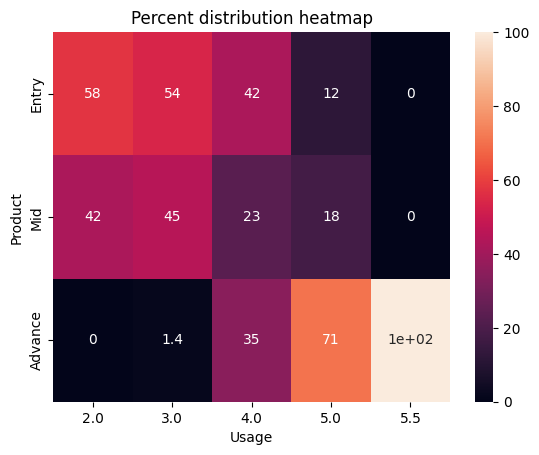

In [ ]:
#Percent distribution heatmap
sns.heatmap(data=use1,annot=True)
plt.title('Percent distribution heatmap')
plt.show()

# Observations:

Entry Product: Highly used at 2.0 weeks (57.58%) and 3.0 weeks (53.62%). Usage drops drastically at 4.0 weeks (42.31%) and falls off nearly completely by 5.0 weeks (11.76% and 0.0%).

Mid Product: Steady usage across 2.0 to 5.0 weeks, peaking at 3.0 weeks (44.93%). Noticeable usage even at 5.0 weeks (17.65%).

Advance Product: Almost no usage at lower week intervals but dramatically increases at 4.0 weeks (34.62%), 5.0 weeks (70.59%), and peaks at 5.5 weeks (100.0%).

# Insights:

Entry Product’s Decline: This product sees early usage but loses traction over time. It’s likely favored for shorter-term usage or initial trials.

Mid Product’s Consistency: Maintains a steady presence across different usage periods. This product appeals to users looking for a balance.

Advance Product’s Late Surge: Becomes significantly more attractive for long-term usage. Users opting for this are likely seeking premium, durable options for extended use.




# Income Group Analysis

In [ ]:
bin = [25000,35000,45000,55000,65000,75000,85000]
label = ['25000-35000','35000-45000','45000-55000','55000-65000','65000-75000','75000-85000']

treadmill['Income group'] = pd.cut(x=treadmill['Income'],bins=bin,labels=label)

In [ ]:
income = pd.crosstab(treadmill['Product'],treadmill['Income group'],margins=True)
income

Income group,25000-35000,35000-45000,45000-55000,55000-65000,65000-75000,75000-85000,All
Product,,,,,,,
Advance,0,0,9,7,3,21,40
Entry,8,26,35,9,2,0,80
Mid,6,9,33,10,2,0,60
All,14,35,77,26,7,21,180


In [ ]:
cols5 = ['25000-35000','35000-45000','45000-55000','55000-65000','65000-75000','75000-85000']
sum5 = {'25000-35000':14,'35000-45000':35,'45000-55000':77,'55000-65000':26,'65000-75000':7,'75000-85000':21}

for a,b in sum5.items():
  income[a] = round((income[a]/b)*100,2)

In [ ]:
income1 = income.loc[['Entry','Mid','Advance'],cols5]
income1

Income group,25000-35000,35000-45000,45000-55000,55000-65000,65000-75000,75000-85000
Product,,,,,,
Entry,57.14,74.29,45.45,34.62,28.57,0.0
Mid,42.86,25.71,42.86,38.46,28.57,0.0
Advance,0.00,0.00,11.69,26.92,42.86,100.0


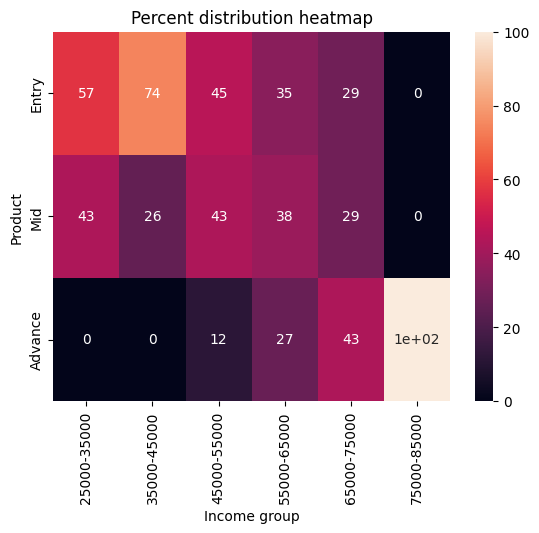

In [ ]:
#Percent distribution heatmap
sns.heatmap(data=income1,annot=True)
plt.title('Percent distribution heatmap')
plt.show()

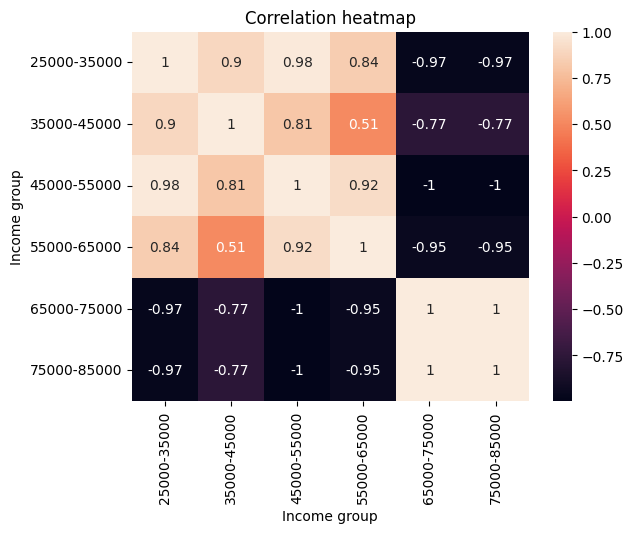

In [ ]:
#Correlation heatmap
sns.heatmap(data=income1.corr(numeric_only=True),annot=True)
plt.title('Correlation heatmap')
plt.show()

# Observations:

Entry Product: Highly popular among lower-income groups (57.14% at 25,000-35,000 and 74.29% at 35,000-45,000). Popularity declines significantly in higher income groups, dropping to 0% at 75,000-85,000.

Mid Product: Shows fairly consistent interest across various income groups, especially noticeable at 25,000-35,000 (42.86%) and 45,000-55,000 (42.86%).

Advance Product: No interest from lower-income groups, but begins to see uptake in higher-income groups, reaching 100% for the 75,000-85,000 income bracket.

# Insights:

Lower-Income Preference for Entry Products: Entry products are a go-to for lower-income groups, likely due to affordability and basic utility.

Mid-Range Consistency: The mid-tier product appeals across several income brackets, suggesting it strikes a good balance of price and quality for a wide range of consumers.

High-Income Tilt Towards Premium: As income increases, there's a clear shift towards the advanced product. Higher-income individuals are willing to invest more in premium features and quality.

#Correlation between Income Groups:
There are strong positive correlations within the lower and mid-income ranges (25,000-35,000 to 55,000-65,000), with values close to 1. However, negative correlations are observed between higher and lower income groups (e.g., 65,000-85,000 versus 25,000-55,000), with values close to -1. Mid-income groups (35,000-45,000 to 55,000-65,000) show mixed correlations with each other.

# Analysis on Number of Miles Expected

In [ ]:
l = [20,50,80,110,140,170,200]
m = ['20-50','50-80','80-110','110-140','140-170','170-200']

treadmill['Miles group'] = pd.cut(x=treadmill['Miles'],bins=l,labels=m)

In [ ]:
miles = pd.crosstab(treadmill['Product'],treadmill['Miles group'],margins=True)
miles

Miles group,20-50,50-80,80-110,110-140,140-170,170-200,All
Product,,,,,,,
Advance,0,1,8,4,10,17,40
Entry,12,26,27,11,3,1,80
Mid,5,16,31,5,2,1,60
All,17,43,66,20,15,19,180


In [ ]:
cols6 = ['20-50','50-80','80-110','110-140','140-170','170-200']
sum6 = {'20-50':17,'50-80':43,'80-110':66,'110-140':20,'140-170':15,'170-200':19}

for a,b in sum6.items():
  miles[a] = round(((miles[a]/b)*100),2)

In [ ]:
miles1 = miles.loc[['Entry','Mid','Advance'],cols6]
miles1

Miles group,20-50,50-80,80-110,110-140,140-170,170-200
Product,,,,,,
Entry,70.59,60.47,40.91,55.0,20.00,5.26
Mid,29.41,37.21,46.97,25.0,13.33,5.26
Advance,0.00,2.33,12.12,20.0,66.67,89.47


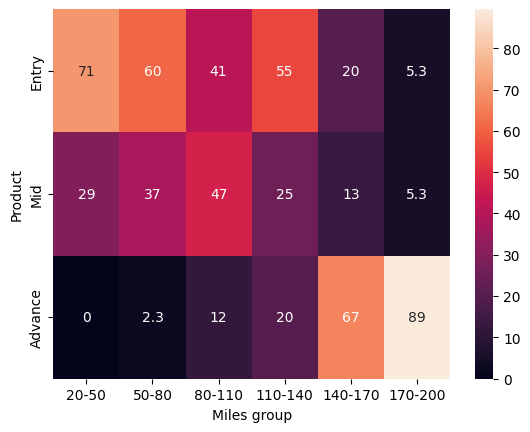

In [ ]:
sns.heatmap(data=miles1,annot=True)
plt.show()

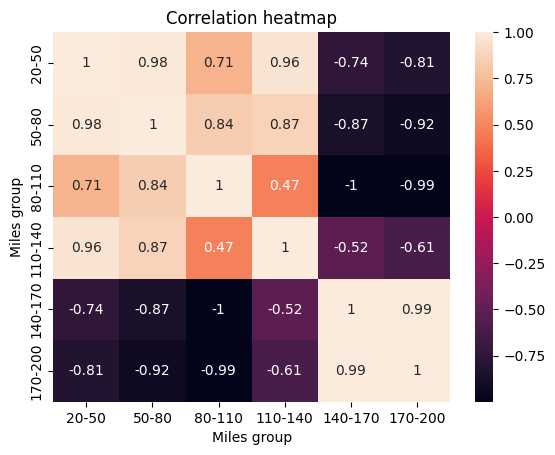

In [ ]:
#Correlation heatmap
sns.heatmap(data=miles1.corr(numeric_only=True),annot=True)
plt.title('Correlation heatmap')
plt.show()

# Observations:

Entry Product:

Highest preference in the 20-50 miles group (70.59%) and 50-80 miles group (60.47%).

Interest decreases significantly beyond the 80-110 miles range.

Almost negligible interest in the 170-200 miles range (5.26%).

Mid Product:

Steady increase from 20-50 miles (29.41%) to 80-110 miles (46.97%).

Noticeable drop at 110-140 miles (25.01%) but picks up a bit beyond that.

Advance Product:

Minimal or no interest up to 50-80 miles (2.33%).

Interest starts at 80-110 miles (12.12%) and increases significantly in higher ranges.

Highest interest in the 170-200 miles range (89.47%).

# Insights:

Short-Distance Preference: People expecting to run shorter distances (20-80 miles) prefer entry-level products, likely due to lower costs and basic needs.

Mid-Distance Consideration: The mid-tier product gains traction with those expecting to run 80-110 miles, indicating a need for better quality without going premium.

Long-Distance Commitment: Advanced products are highly favored by those planning to cover 140 miles and beyond, reflecting a willingness to invest in premium features and durability for extensive usage.

# Correlation between avg expected miles

Strong positive correlations are observed within closer mileage groups, especially between 20-50, 50-80, and 110-140 miles, with values close to 1. However, there are strong negative correlations between distant mileage groups, such as 80-110 and 140-200 miles, with values around -1. The 80-110 miles group shows the most varied correlations, having both positive and negative relationships with other mileage ranges.



---



# **Entry Level Product Customer Profile**

In [ ]:
t0 = treadmill[(treadmill['Product']=='Entry') & (treadmill['Gender']=='Male')]
pd.crosstab(index=t0['age group'],columns=t0['Income group'],margins=True)

Income group,25000-35000,35000-45000,45000-55000,55000-65000,65000-75000,All
age group,,,,,,
18-24,4,9,1,0,0,14
24-30,0,3,9,0,1,13
30-36,0,1,4,0,0,5
36-46,0,0,4,4,0,8
All,4,13,18,4,1,40


In [ ]:
#Probability that a Male from particular age group and income group buys an entry level product
t0n = treadmill[(treadmill['Product']=='Entry') & (treadmill['Gender']=='Male')]
pd.crosstab(index=t0n['age group'],columns=t0n['Income group'],normalize=True)

Income group,25000-35000,35000-45000,45000-55000,55000-65000,65000-75000
age group,,,,,
18-24,0.1,0.225,0.025,0.0,0.000
24-30,0.0,0.075,0.225,0.0,0.025
30-36,0.0,0.025,0.100,0.0,0.000
36-46,0.0,0.000,0.100,0.1,0.000


In [ ]:
t = treadmill[(treadmill['Product']=='Entry') & (treadmill['Gender']=='Female')]
pd.crosstab(index=t['age group'],columns=t['Income group'],margins=True)

Income group,25000-35000,35000-45000,45000-55000,55000-65000,65000-75000,All
age group,,,,,,
18-24,4,8,1,0,0,13
24-30,0,4,11,0,0,15
30-36,0,0,4,2,1,7
36-46,0,1,1,3,0,5
All,4,13,17,5,1,40


In [ ]:
#Probability that a Female from particular age group and income group buys an entry level product
tn = treadmill[(treadmill['Product']=='Entry') & (treadmill['Gender']=='Female')]
pd.crosstab(index=tn['age group'],columns=tn['Income group'],normalize=True)

Income group,25000-35000,35000-45000,45000-55000,55000-65000,65000-75000
age group,,,,,
18-24,0.1,0.200,0.025,0.000,0.000
24-30,0.0,0.100,0.275,0.000,0.000
30-36,0.0,0.000,0.100,0.050,0.025
36-46,0.0,0.025,0.025,0.075,0.000


# **Customer Profile Summary for Entry-Level Treadmill**

Target Customer: Individuals aged 18-30 years with an income between $25,000 - $55,000.

Gender Distribution: Nearly equal interest across both male and female groups, with slight age and income group nuances.

Core Segments:
Males aged 18-24 in the $25,000 - $45,000 income range.
Females aged 24-30 in the $35,000 - $55,000 income range.

# **Business Recommendations**

- **Product Positioning:** Position the entry-level product as a reliable, affordable option ideal for young professionals and recent graduates. Emphasize value for money, essential features, and affordability, appealing to customers who are budget-conscious yet want quality.

- **Marketing Strategy:** Utilize platforms like Instagram, TikTok, and Facebook, where younger demographics are highly active. Focus on engaging, visual content that highlights affordability and style, attracting young professionals and first-time buyers.

- **Online Sales Platforms**: Offer the product on popular e-commerce platforms (e.g., Amazon, eBay) to tap into the growing trend of online shopping among young consumers.

- **Student and Young Professional Discounts**: Introduce discounts specifically for students and entry-level professionals, such as through university partnerships or young professional organizations.

- **Flexible Payment Options:** Providing installment or “buy now, pay later” options would make the product more accessible to those within the $25,000 - $55,000 income range.

- **Promotions and Bundles:** Offer occasional discounts or bundle options, such as combining with essential accessories, which can enhance perceived value and attract more budget-conscious customers.

# **Mid Level Product Customer Profile**

In [ ]:
m0 = treadmill[(treadmill['Product']=='Mid') & (treadmill['Gender']=='Male')]
pd.crosstab(index=m0['age group'],columns=m0['Income group'],margins=True)

Income group,25000-35000,35000-45000,45000-55000,55000-65000,65000-75000,All
age group,,,,,,
18-24,4,3,3,0,0,10
24-30,0,1,7,0,0,8
30-36,0,0,6,2,1,9
36-46,0,0,1,3,0,4
All,4,4,17,5,1,31


In [ ]:
#Probability that a Male from particular age group and income group buys an Mid level product
m0n = treadmill[(treadmill['Product']=='Mid') & (treadmill['Gender']=='Male')]
pd.crosstab(index=m0n['age group'],columns=m0n['Income group'],normalize=True)

Income group,25000-35000,35000-45000,45000-55000,55000-65000,65000-75000
age group,,,,,
18-24,0.129032,0.096774,0.096774,0.000000,0.000000
24-30,0.000000,0.032258,0.225806,0.000000,0.000000
30-36,0.000000,0.000000,0.193548,0.064516,0.032258
36-46,0.000000,0.000000,0.032258,0.096774,0.000000


In [ ]:
m = treadmill[(treadmill['Product']=='Mid') & (treadmill['Gender']=='Female')]
pd.crosstab(index=m['age group'],columns=m['Income group'],margins=True)

Income group,25000-35000,35000-45000,45000-55000,55000-65000,65000-75000,All
age group,,,,,,
18-24,2,3,2,0,0,7
24-30,0,2,7,1,0,10
30-36,0,0,6,1,1,8
36-46,0,0,1,3,0,4
All,2,5,16,5,1,29


In [ ]:
#Probability that a Female from particular age group and income group buys an mid level product
mn = treadmill[(treadmill['Product']=='Mid') & (treadmill['Gender']=='Female')]
pd.crosstab(index=mn['age group'],columns=mn['Income group'],margins=True)

Income group,25000-35000,35000-45000,45000-55000,55000-65000,65000-75000,All
age group,,,,,,
18-24,2,3,2,0,0,7
24-30,0,2,7,1,0,10
30-36,0,0,6,1,1,8
36-46,0,0,1,3,0,4
All,2,5,16,5,1,29


# **Customer Profile Summary for Mid-Level Treadmill**

Target Customer: Individuals aged 24-36 with incomes between $35,000 - $55,000.

Gender: Balanced distribution, but with nuances in age and income brackets.

Core Segments:
Males aged 24-36 in the $45,000 - $55,000 income range.
Females aged 24-30 in the $35,000 - $55,000 income range.

# **Business Recommendations**

**Positioning**: Position the mid-level product as an upgrade from entry-level offerings, emphasizing quality and added features that justify a slightly higher price point. Highlight durability, value for money, and possibly customization or versatile options.

**Targeted Digital Marketing:** Use social media platforms and digital ads focusing on professional platforms for the 24-36 demographic. Promote in professional networks and platforms that young to mid-level professionals frequent.

**Gender-Specific Campaigns:** For males, focus on practical value and long-term reliability, especially for those in the 30-36 bracket. For females aged 24-30, highlight affordability with quality enhancements.
Develop content that emphasizes the practical benefits of upgrading to a mid-level product, such as testimonials, case studies, or product comparisons.

**Expand Online Sales Presence:** Many young professionals prefer online shopping, so optimizing e-commerce options is essential. Consider offering in-store experiences where customers can explore product features, especially for those in higher-income brackets who may appreciate hands-on evaluation.

**Pricing Strategy:** Maintain a balanced pricing strategy that aligns closely with the $35,000 - $55,000 income group’s willingness to spend. Consider flexible payment options or limited-time promotions to encourage purchases in this price-sensitive group.

# **Advance Level Product Customer Profile**

In [ ]:
ad = treadmill[(treadmill['Product']=='Advance') & (treadmill['Gender']=='Male')]
pd.crosstab(index=ad['age group'],columns=ad['Income group'])

Income group,45000-55000,55000-65000,65000-75000,75000-85000
age group,,,,
18-24,5,3,0,0
24-30,2,3,2,9
30-36,0,0,0,3
36-46,0,0,0,6


In [ ]:
#Probability that a Male from particular age group and income group buys an Advance level product
adn = treadmill[(treadmill['Product']=='Advance') & (treadmill['Gender']=='Male')]
pd.crosstab(index=adn['age group'],columns=adn['Income group'],normalize=True)

Income group,45000-55000,55000-65000,65000-75000,75000-85000
age group,,,,
18-24,0.151515,0.090909,0.000000,0.000000
24-30,0.060606,0.090909,0.060606,0.272727
30-36,0.000000,0.000000,0.000000,0.090909
36-46,0.000000,0.000000,0.000000,0.181818


In [ ]:
ad2 = treadmill[(treadmill['Product']=='Advance') & (treadmill['Gender']=='Female')]
pd.crosstab(index=ad2['age group'],columns=ad2['Income group'])

Income group,45000-55000,55000-65000,65000-75000,75000-85000
age group,,,,
18-24,2,0,0,0
24-30,0,1,1,2
30-36,0,0,0,1


In [ ]:
#Probability that a Female from particular age group and income group buys an Advance level product
ad2n = treadmill[(treadmill['Product']=='Advance') & (treadmill['Gender']=='Female')]
pd.crosstab(index=ad2n['age group'],columns=ad2n['Income group'],normalize=True)

Income group,45000-55000,55000-65000,65000-75000,75000-85000
age group,,,,
18-24,0.285714,0.000000,0.000000,0.000000
24-30,0.000000,0.142857,0.142857,0.285714
30-36,0.000000,0.000000,0.000000,0.142857


# **Customer Profile Summary for Advanced-Level Product**

Target Customer: Males aged 24-46 with incomes primarily between $75,000 - $85,000.

Secondary Market: Females aged 24-30 in the $55,000 - $65,000 range.

Core Segments:
Males in the 24-30 age group with an income range of $75,000 - $85,000.
Males in the 36-46 age group in the $75,000 - $85,000 range.
Females in the 24-30 age group in the $55,000 - $65,000 range (secondary market).

# **Business Recommendations**

**Product positioning**: Position the advanced-level product as a premium offering with high-quality features, exclusivity, and enhanced functionality. Emphasize luxury, innovation, and the prestige associated with owning a high-end product, which resonates well with higher-income customers.


**Luxury Branding and Targeted Advertising:** Use premium branding with a focus on exclusivity and high quality. Digital marketing should target high-income professionals in the 24-46 age group with tailored ads on LinkedIn, Instagram, and targeted Google ads.
Appeal to Aspirational Aspects: For males in the 24-30 group, highlight status, technological advancement, and the product’s alignment with a successful lifestyle. For the 36-46 segment, emphasize reliability, longevity, and quality.


**Female Segment Campaigns:** Though a secondary market, target women in the 24-30 range by focusing on specific, highly valued product features, such as personalization options, and high-quality materials, showcasing the product as both sophisticated and practical.


**High-End Retail Partnerships:** Partner with upscale retail stores and luxury department stores where customers in this demographic often shop.
Direct-to-Consumer Premium Channels: Consider offering an exclusive online store experience with personalized services (e.g., customizations, live product consultations) to appeal to the high-income, professional demographic.


**Premium Pricing Strategy:** Ensure that the pricing reflects the high-end quality and status associated with the product. Avoid heavy discounts, as they may diminish the perception of exclusivity. Use limited-time offers, exclusive early access, or bundled premium services to entice this group. Offer loyalty programs with rewards for high-value purchases, which could further engage this affluent customer base.

In [ ]:
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')
print('dscs')